# Churn of an Internet & Telephone Provider (Cohort and Predictive Analysis)
## (Supervised Learning Capstone Project) 

------
------

## GOAL: To create a model to predict whether or not a customer will Churn .

----
----

## Part 0: Importing and Reading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Using .describe method on dataset to get a quick statistical summary on the numeric columns**

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
## Observing this we can conclude that "SeniorCitizen" is a Categorical Variable

# Part 2:  Exploratory Data Analysis

## General Feature Exploration


**Checking for null values**

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Checking the balance of class labels (churn) using Count Plot**

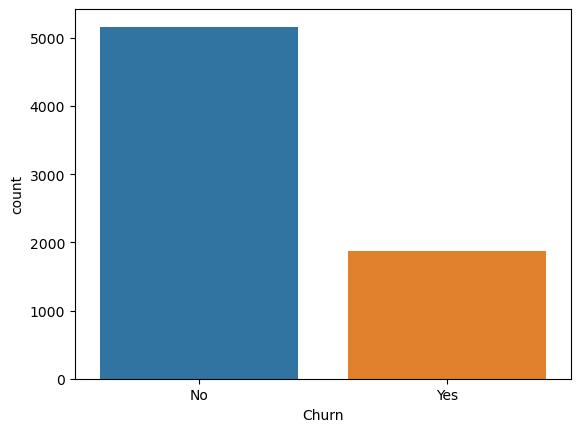

In [13]:
sns.countplot(data = df, x = 'Churn')
plt.show()

**TASK: Exploring the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

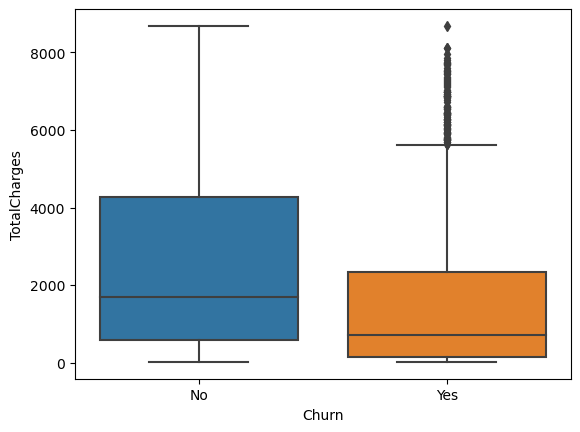

In [12]:
sns.boxplot(data = df, x = 'Churn', y = 'TotalCharges')
plt.show()

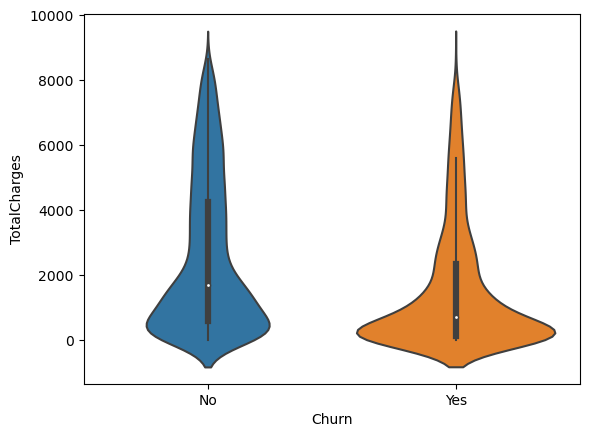

In [11]:
sns.violinplot(data = df, x = 'Churn', y = 'TotalCharges')
plt.show()

**TASK: Creating a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

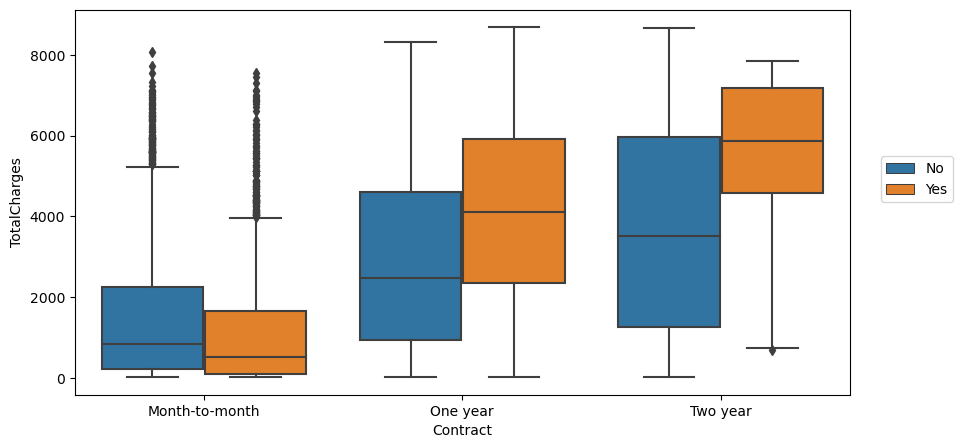

In [14]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x= "Contract", y = 'TotalCharges', hue = 'Churn')
plt.legend(loc = (1.04,0.5))

**TASK: Creating a bar plot showing the correlation of the following features to the class label. For the categorical features, I will convert them into dummy variables first, as we can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df1 = df.drop('customerID',axis = 1)

In [18]:
df1['SeniorCitizen'] = df1['SeniorCitizen'].apply(str)

In [19]:
df1 = pd.get_dummies(df1,drop_first = True)

In [20]:
df1.corr()['Churn_Yes'].sort_values()

tenure                                  -0.354049
Contract_Two year                       -0.301552
OnlineBackup_No internet service        -0.227578
OnlineSecurity_No internet service      -0.227578
InternetService_No                      -0.227578
TechSupport_No internet service         -0.227578
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
TotalCharges                            -0.199484
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691


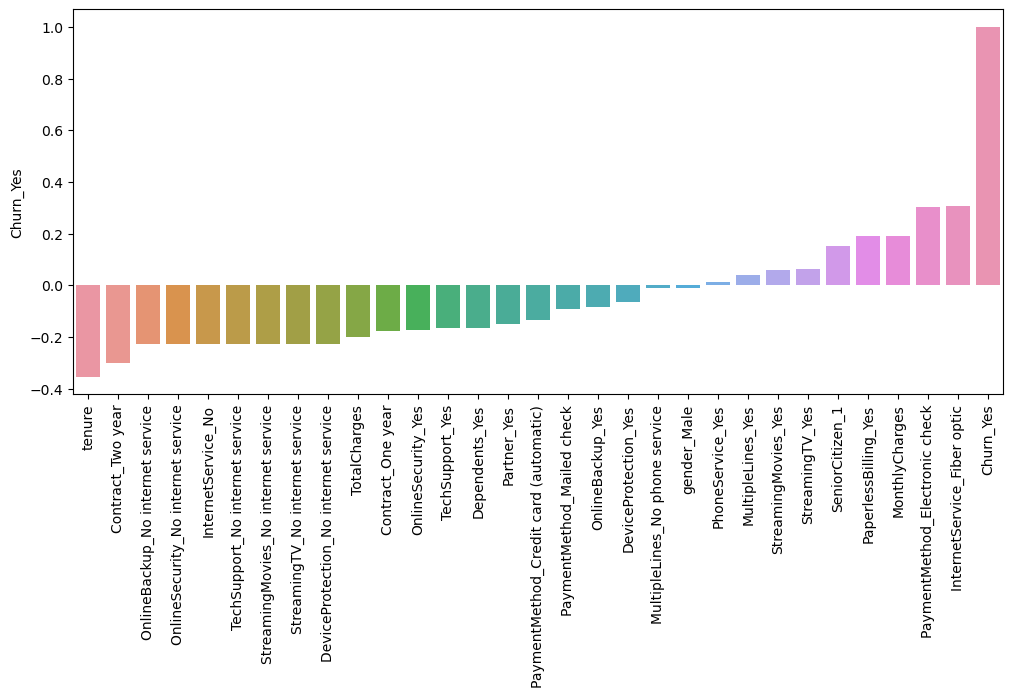

In [26]:
plt.figure(figsize = (12,5))
corr_df = df1.corr()['Churn_Yes'].sort_values()
sns.barplot(y = corr_df,x = corr_df.index)
plt.xticks(rotation = 90)
plt.show()

---
---

# Part 3: Churn Analysis

**Segmenting customers based on their tenure, creating "cohorts", which allows to examine differences between customer cohort segments.**

**3 available Contract types**

In [27]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Text(0.5, 0, 'Contracts')

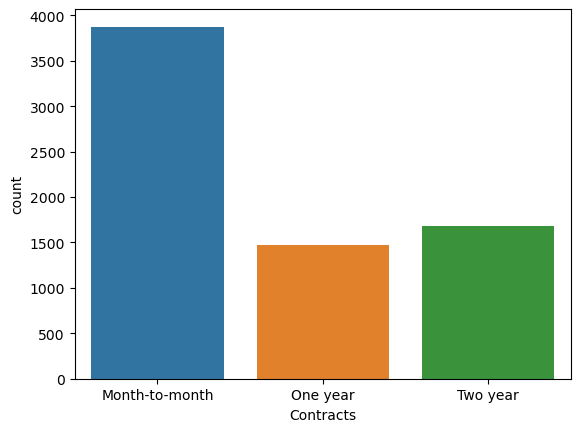

In [28]:
sns.countplot(data = df, x = 'Contract')
plt.xlabel('Contracts')

**Creating a histogram to display the distribution of 'tenure' column, which is the amount of months a customer was or has been a customer.**

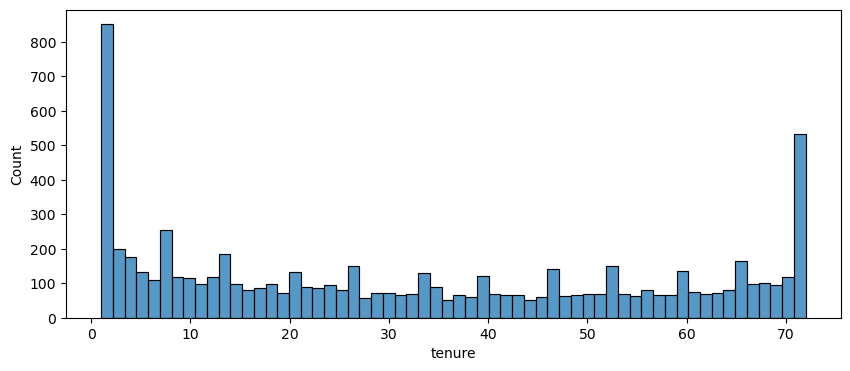

In [30]:
plt.figure(figsize = (10,4))
sns.histplot(data = df, x = 'tenure', bins = 60)
plt.show()

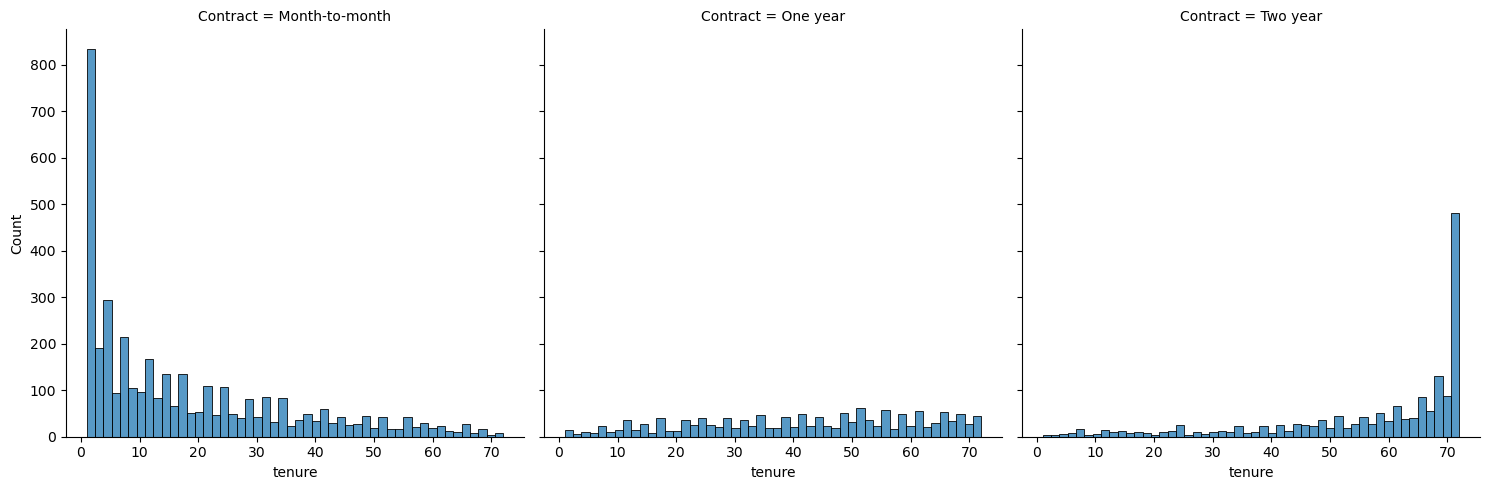

In [31]:
sns.displot(data = df, x = 'tenure', col = 'Contract', bins = 50)
plt.show()

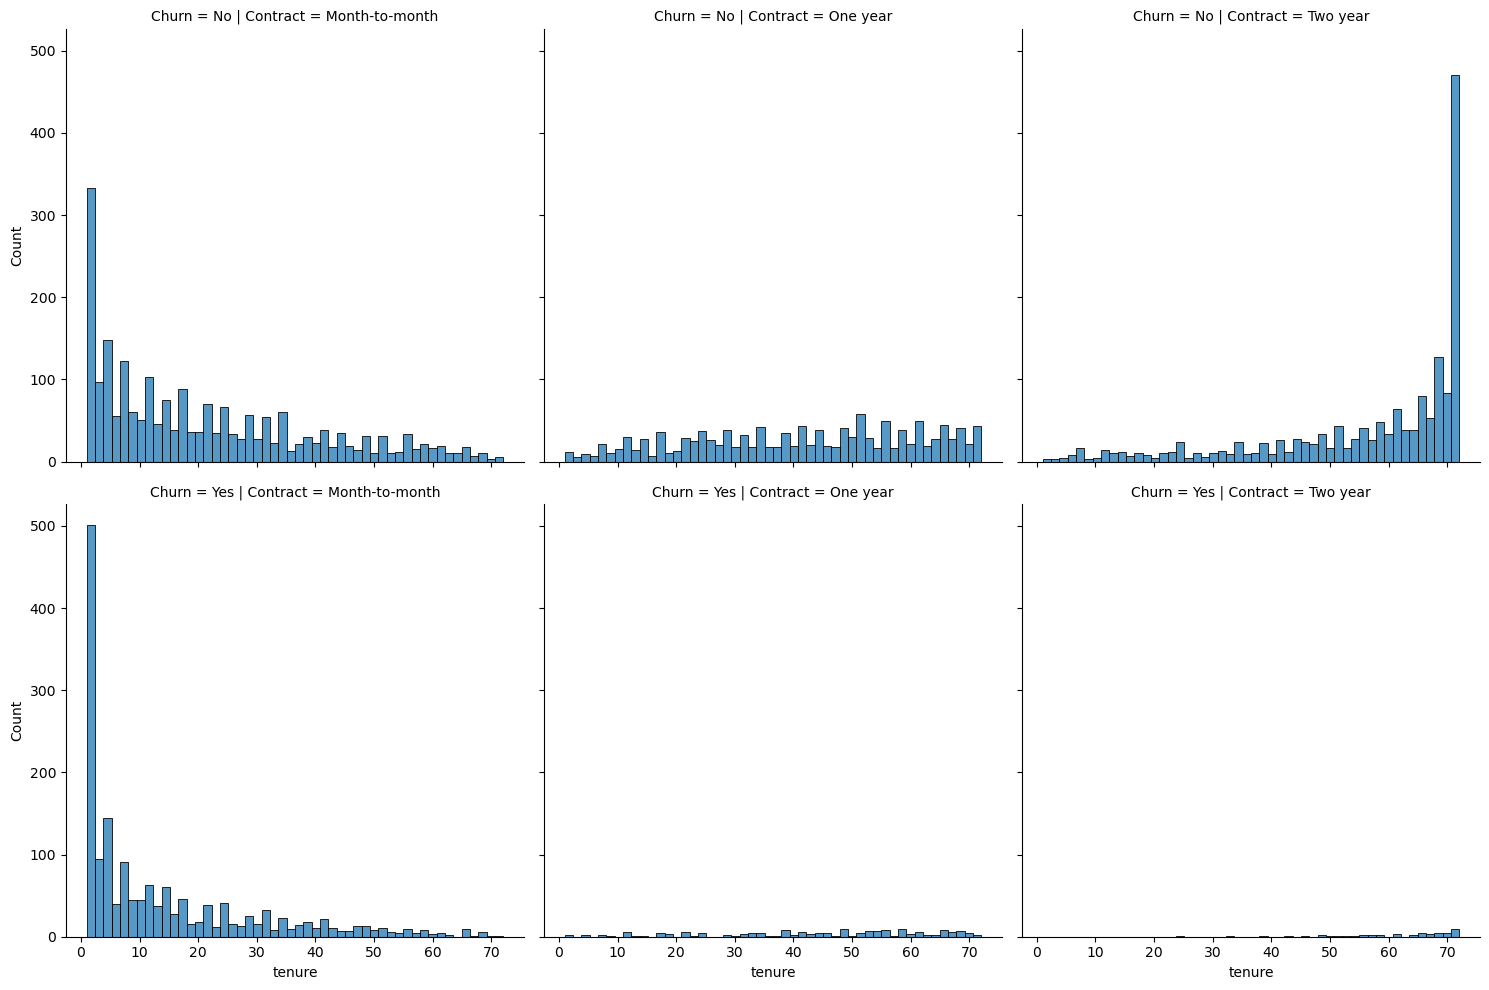

In [32]:
sns.displot(data = df, x = 'tenure', col = 'Contract', row = 'Churn', bins = 50)
plt.show()

**Displaying a scatter plot of Total Charges versus Monthly Charges**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

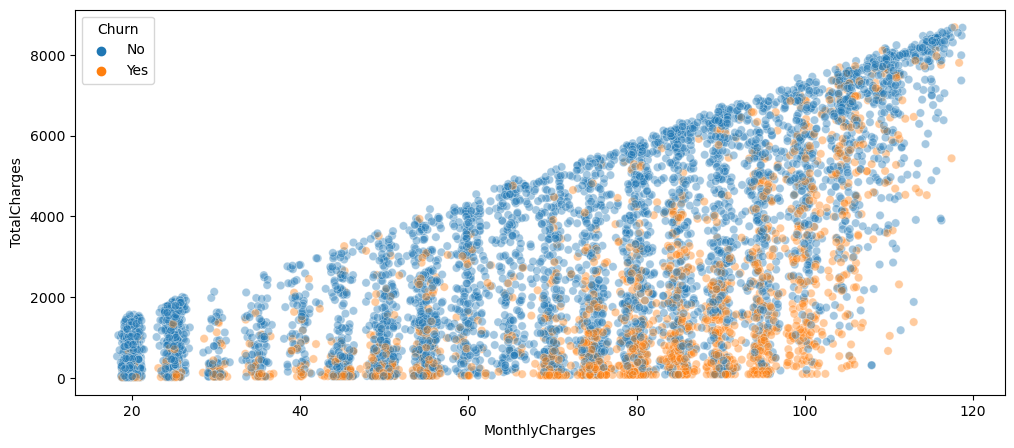

In [33]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df, x = 'MonthlyCharges',y='TotalCharges', hue = 'Churn',alpha = 0.4)

In [34]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df1[['tenure','Churn_Yes']]

,tenure,Churn_Yes
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1
...,...,...
7027,24,0
7028,72,0
7029,11,0
7030,4,1


In [37]:
df1.groupby('tenure').mean()

,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
tenure,,,,,,,,,,,,,,,,,,,,,
1,50.485808,50.485808,0.536705,0.140294,0.159869,0.169657,0.905383,0.094617,0.132137,0.383361,...,0.130506,0.270799,0.133768,0.011419,0.003263,0.575856,0.048940,0.473083,0.419250,0.619902
2,57.206303,114.332353,0.453782,0.180672,0.201681,0.117647,0.915966,0.084034,0.184874,0.457983,...,0.189076,0.197479,0.210084,0.029412,0.004202,0.558824,0.100840,0.483193,0.319328,0.516807
3,58.015000,174.690000,0.495000,0.125000,0.235000,0.160000,0.860000,0.140000,0.240000,0.450000,...,0.285000,0.195000,0.225000,0.030000,0.015000,0.615000,0.110000,0.465000,0.365000,0.470000
4,57.432670,230.530682,0.500000,0.147727,0.272727,0.227273,0.892045,0.107955,0.318182,0.437500,...,0.215909,0.215909,0.232955,0.039773,0.022727,0.590909,0.107955,0.488636,0.312500,0.471591
5,61.003759,304.491353,0.503759,0.180451,0.270677,0.195489,0.902256,0.097744,0.270677,0.488722,...,0.270677,0.187970,0.248120,0.030075,0.007519,0.593985,0.135338,0.458647,0.315789,0.481203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,73.321000,5006.300000,0.520000,0.130000,0.740000,0.440000,0.890000,0.110000,0.620000,0.410000,...,0.490000,0.180000,0.570000,0.250000,0.650000,0.590000,0.360000,0.190000,0.070000,0.090000
69,70.823158,4876.041579,0.578947,0.136842,0.736842,0.442105,0.894737,0.105263,0.578947,0.442105,...,0.515789,0.242105,0.515789,0.242105,0.694737,0.621053,0.410526,0.084211,0.105263,0.084211
70,76.378992,5349.057143,0.478992,0.142857,0.806723,0.394958,0.882353,0.117647,0.672269,0.394958,...,0.630252,0.168067,0.613445,0.226891,0.739496,0.554622,0.386555,0.168067,0.075630,0.092437


In [38]:
ser1 = df1.groupby('tenure').mean()['Churn_Yes']*100

In [39]:
ser1

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn_Yes, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

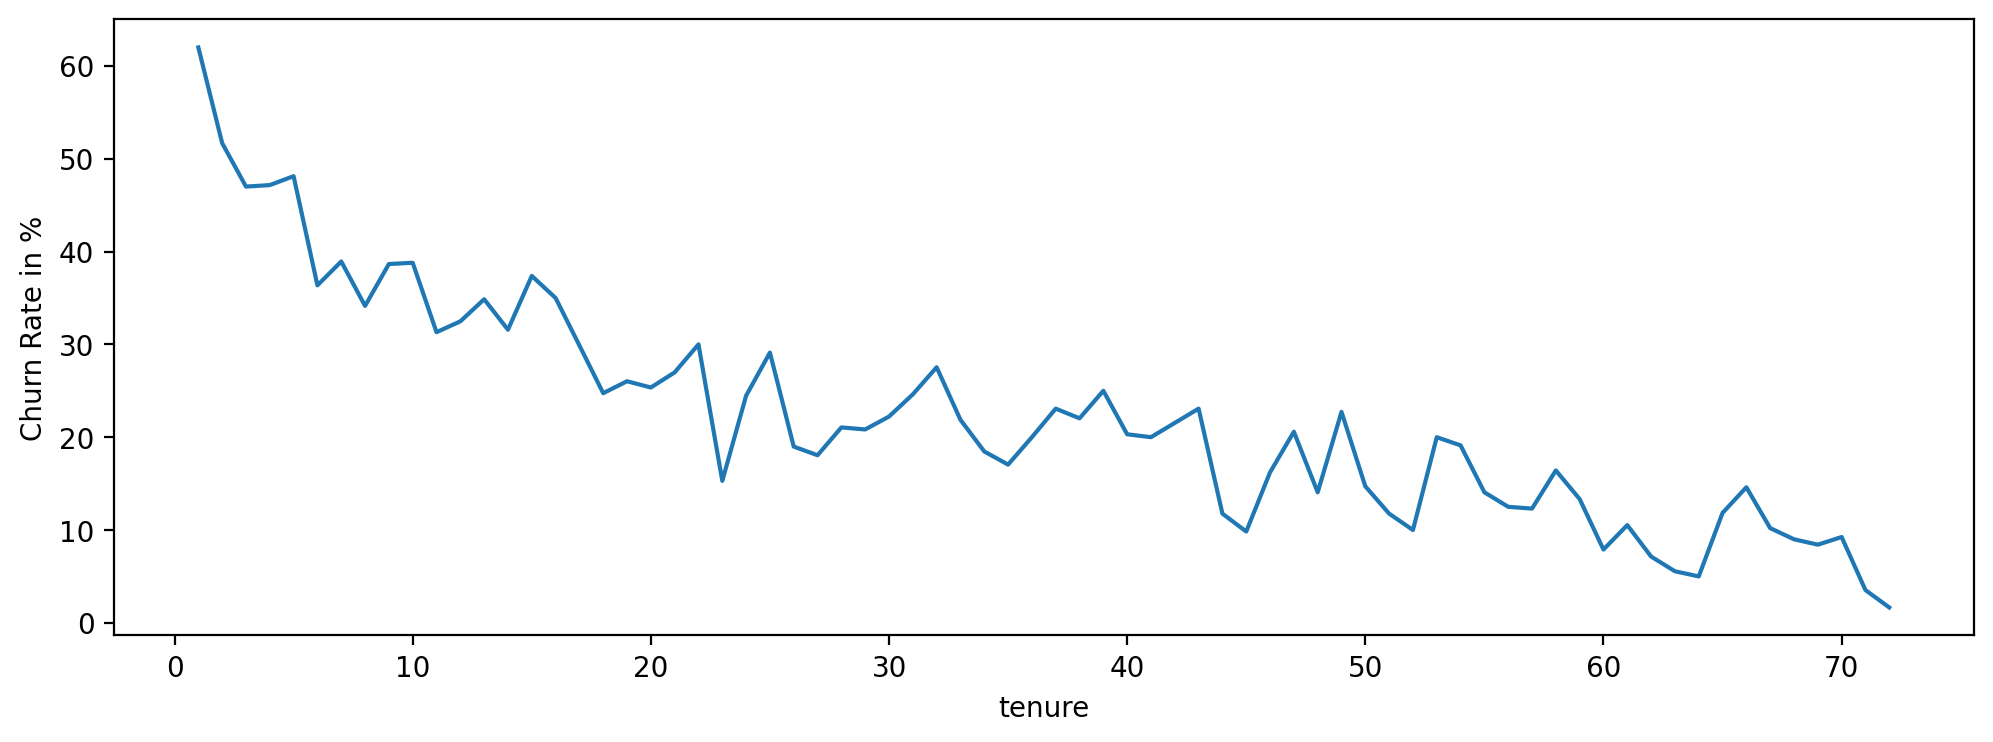

In [40]:
plt.figure(figsize = (12,4), dpi = 200)
plt.plot(ser1.index,ser1)
plt.xlabel('tenure')
plt.ylabel('Churn Rate in %')
plt.show()

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [41]:
def create_cohort(value):
    if value<13:
        return '0-12 Months'
    elif value<25:
        return '12-24 Months'
    elif value<49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [42]:
df['Tenure Cohort'] = df['tenure'].apply(create_cohort)

In [43]:
df['Tenure Cohort']

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7027      12-24 Months
7028    Over 48 Months
7029       0-12 Months
7030       0-12 Months
7031    Over 48 Months
Name: Tenure Cohort, Length: 7032, dtype: object

In [44]:
df[['tenure','Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

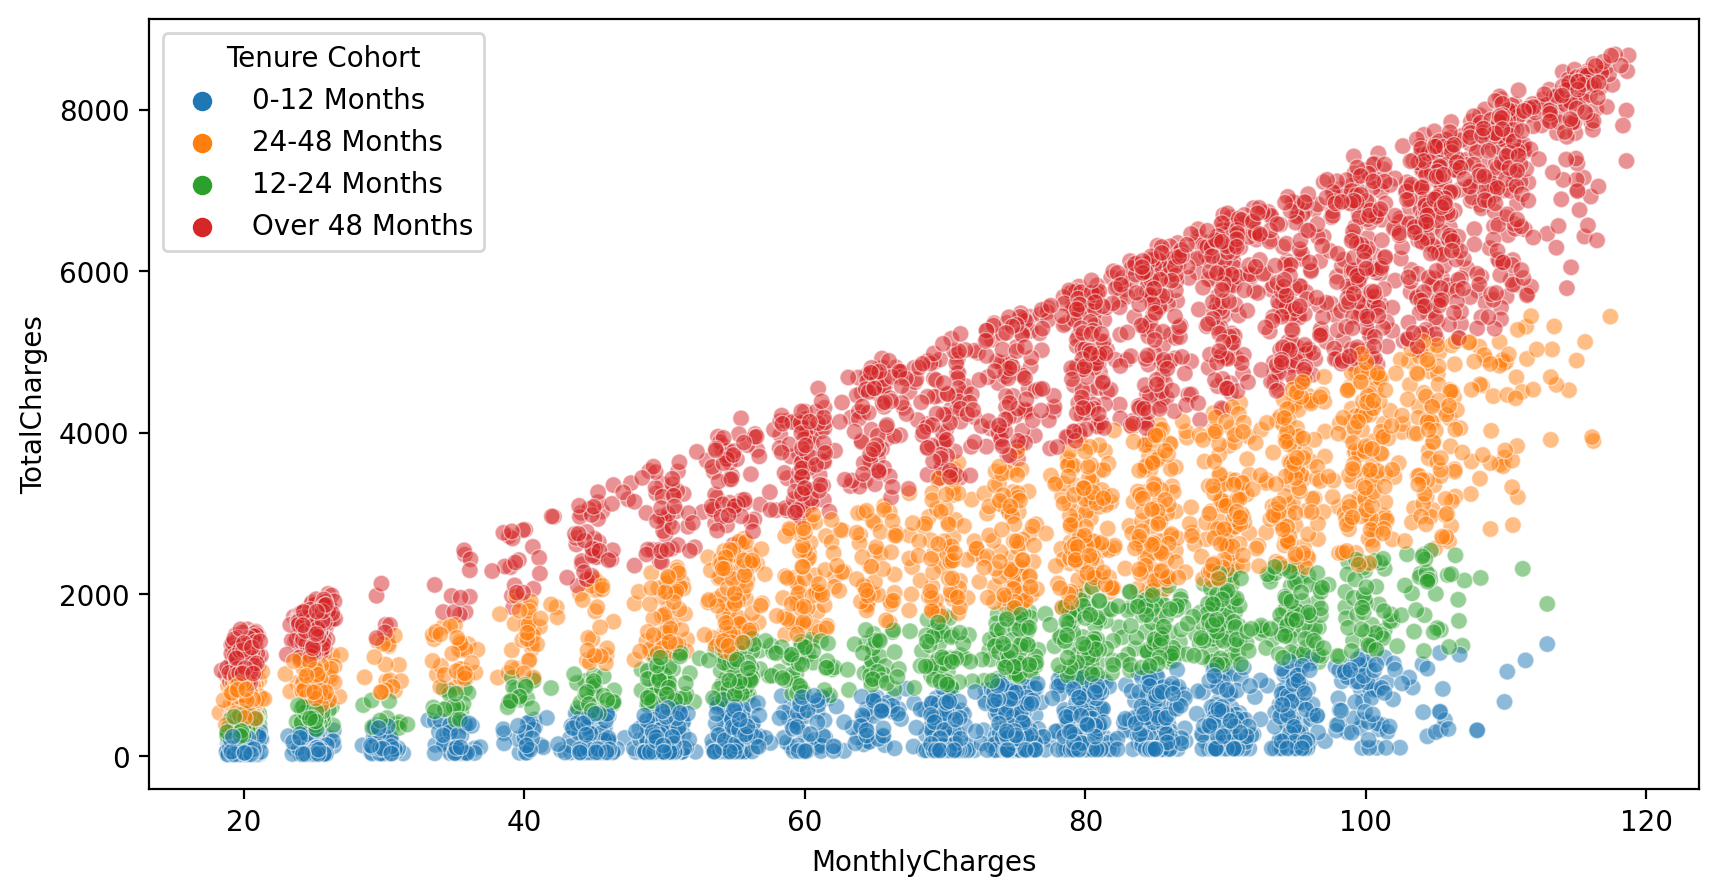

In [45]:
plt.figure(figsize = (10,5), dpi = 200)
sns.scatterplot(data = df, y='TotalCharges',  x='MonthlyCharges', hue = 'Tenure Cohort', alpha = 0.5)
plt.show()

**TASK: Create a count plot showing the churn count per cohort.**

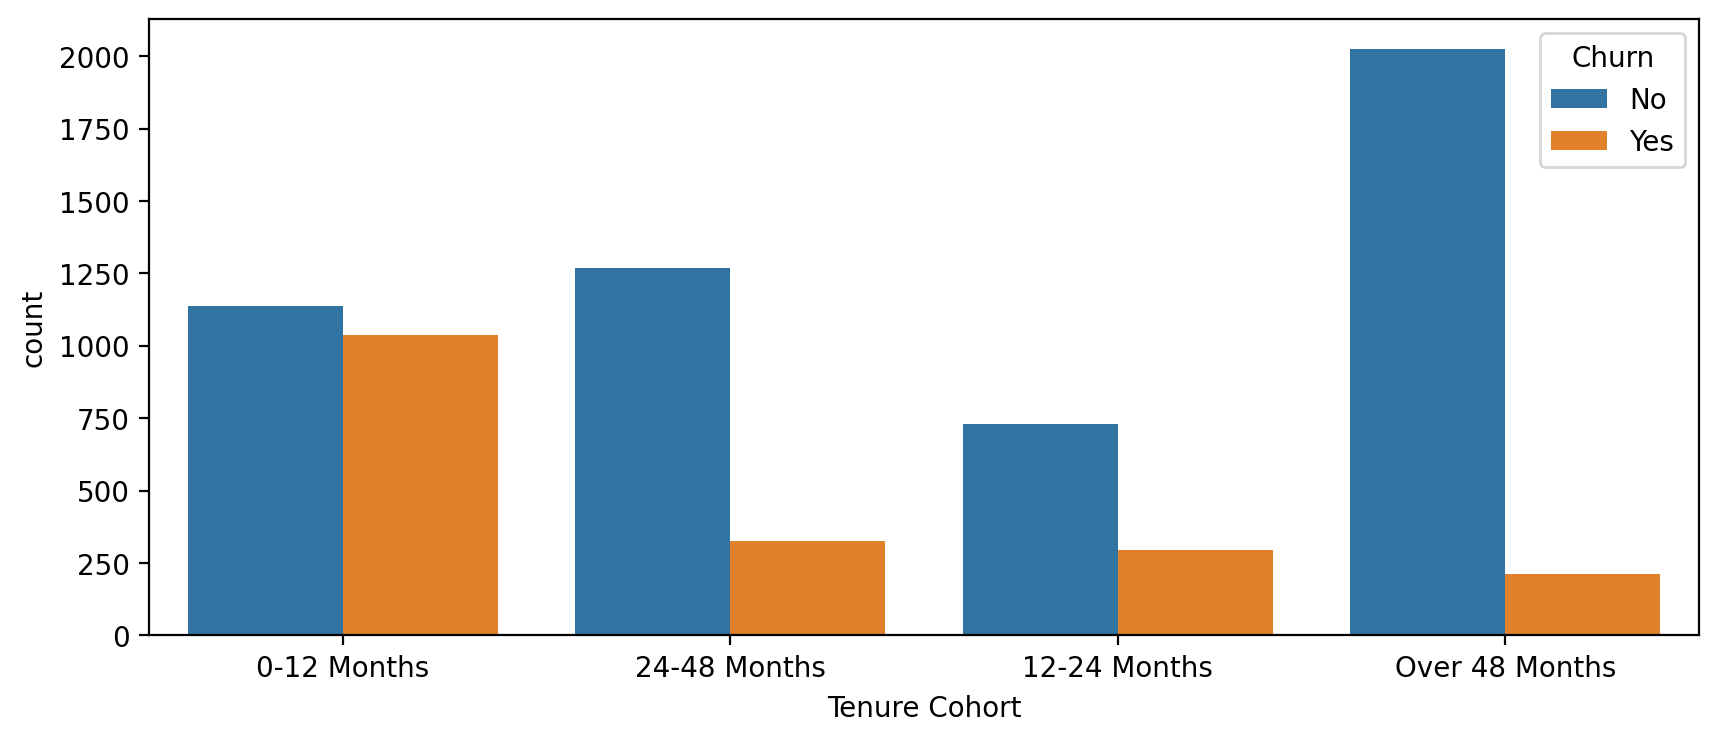

In [46]:
plt.figure(figsize = (10,4), dpi = 200)
sns.countplot(data = df,x = 'Tenure Cohort', hue = 'Churn')
plt.show()

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

<Figure size 1280x960 with 0 Axes>

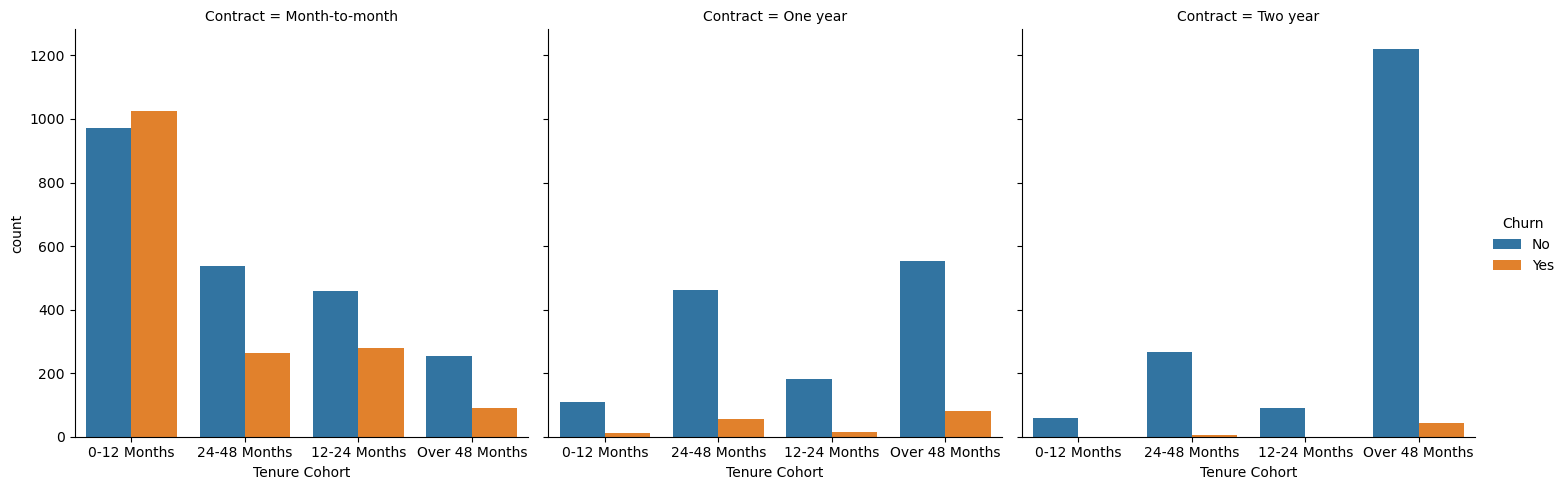

In [47]:
plt.figure(dpi = 200)
sns.catplot(data = df, x = 'Tenure Cohort', hue = 'Churn', col = 'Contract', kind = 'count')
plt.show()

-----

# Part 4: Predictive Modeling


In [48]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [49]:
X = df.drop(['customerID','Churn'],axis = 1)
y = df['Churn']

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [53]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [54]:
from sklearn import set_config
set_config(display = 'diagram')

In [55]:
numeric_df = X.select_dtypes(exclude = 'object').drop('SeniorCitizen',axis = 1)
categorical_df = X.select_dtypes(include = 'object')

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [57]:
numeric_pipe = Pipeline([
    ('impute_numeric_df',SimpleImputer(strategy='mean')),
    ('scale_numeric_df',StandardScaler())
])

In [58]:
categorical_pipe = Pipeline([
    ('impute_category_df',SimpleImputer(strategy='most_frequent')),
    ('ohe_category_df',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'))
])

In [59]:
preprocessor = ColumnTransformer([
    ('numerical',numeric_pipe,numeric_df.columns.values),
    ('categorical',categorical_pipe,categorical_df.columns.values)
],remainder = 'passthrough')

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### Decision Tree

In [61]:
dt_model = DecisionTreeClassifier()

In [62]:
pipe = Pipeline([
    ('preprocessor',preprocessor),
    ('dt_model',dt_model)
])

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'dt_model__max_depth':[5,8,10,12],
              'dt_model__min_samples_split':[0.05,0.1]}

In [65]:
grid = GridSearchCV(pipe, param_grid,cv=5,n_jobs=3)

In [67]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('impute_numeric_df',
                                                                                          SimpleImputer()),
                                                                                         ('scale_numeric_df',
                                                                                          StandardScaler())]),
                                                                         array(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('impute_category_df',
                                                                                          SimpleImpu...
                                                                         array(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Tenure Cohort'], dtype=object))])),
                                       ('dt_model', DecisionTreeClassifier())]),
             n_jobs=3,
             param_grid={'dt_model__max_depth': [5, 8, 10, 12],
                         'dt_model__min_samples_split': [0.05, 0.1]})

In [68]:
y_pred = grid.predict(X_test)

In [69]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.90      0.88       557
         Yes       0.56      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



In [71]:
confusion_matrix(y_test,y_pred)

array([[500,  57],
       [ 75,  72]], dtype=int64)

In [73]:
grid.best_params_

{'dt_model__max_depth': 8, 'dt_model__min_samples_split': 0.05}

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [75]:
pipe2 = Pipeline([
    ('preprocessor',preprocessor),
    ('rf_model',RandomForestClassifier())
])

In [76]:
param_grid2 = {'rf_model__n_estimators':[70,100,130,170],
              'rf_model__max_depth':[5,8,10],
              'rf_model__max_features':['sqrt', 'log2'],
              'rf_model__min_samples_split':[0.1,0.08,0.05]}

In [77]:
grid2 = GridSearchCV(pipe2,param_grid2,cv=5,n_jobs=2,verbose=3)

In [78]:
grid2.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('impute_numeric_df',
                                                                                          SimpleImputer()),
                                                                                         ('scale_numeric_df',
                                                                                          StandardScaler())]),
                                                                         array(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('impute_category_df',
                                                                                          SimpleImpu...
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Tenure Cohort'], dtype=object))])),
                                       ('rf_model', RandomForestClassifier())]),
             n_jobs=2,
             param_grid={'rf_model__max_depth': [5, 8, 10],
                         'rf_model__max_features': ['sqrt', 'log2'],
                         'rf_model__min_samples_split': [0.1, 0.08, 0.05],
                         'rf_model__n_estimators': [70, 100, 130, 170]},
             verbose=3)

In [79]:
y_pred2 = grid2.predict(X_test)

In [125]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

          No       0.85      0.93      0.89       557
         Yes       0.60      0.39      0.48       147

    accuracy                           0.82       704
   macro avg       0.73      0.66      0.68       704
weighted avg       0.80      0.82      0.80       704



In [127]:
accuracy_score(y_test, y_pred2)

0.8196022727272727

## Boosted Trees

**AdaBoost**

In [81]:
pipe3 = Pipeline([
    ('preprocessor',preprocessor),
    ('ab_model',AdaBoostClassifier())
])

In [82]:
param_grid3 = {'ab_model__n_estimators':[35,50,70,100],
              'ab_model__learning_rate':[0.1,0.4,0.7,1]}

In [83]:
grid3 = GridSearchCV(pipe3,param_grid3,cv=5,n_jobs=2,verbose=3)

In [84]:
grid3.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('impute_numeric_df',
                                                                                          SimpleImputer()),
                                                                                         ('scale_numeric_df',
                                                                                          StandardScaler())]),
                                                                         array(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('impute_category_df',
                                                                                          SimpleImpu...
                                                                         array(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Tenure Cohort'], dtype=object))])),
                                       ('ab_model', AdaBoostClassifier())]),
             n_jobs=2,
             param_grid={'ab_model__learning_rate': [0.1, 0.4, 0.7, 1],
                         'ab_model__n_estimators': [35, 50, 70, 100]},
             verbose=3)

In [85]:
y_pred3 = grid3.predict(X_test)

In [86]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.52      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.82       704



In [124]:
accuracy_score(y_test, y_pred3)

0.8267045454545454

**Gradient Boosting**

In [87]:
pipe4 = Pipeline([
    ('preprocessor',preprocessor),
    ('gb_model',GradientBoostingClassifier())
])

In [88]:
param_grid4 = {'gb_model__n_estimators':[35,50,70,100],
               'gb_model__learning_rate':[0.1,0.4,0.7,1],
               'gb_model__min_samples_split':[0.1,0.07],
               'gb_model__max_depth':[4,5]}

In [89]:
grid4 = GridSearchCV(pipe4,param_grid4,cv=5,n_jobs=2,verbose=3)

In [90]:
grid4.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('impute_numeric_df',
                                                                                          SimpleImputer()),
                                                                                         ('scale_numeric_df',
                                                                                          StandardScaler())]),
                                                                         array(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('impute_category_df',
                                                                                          SimpleImpu...
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Tenure Cohort'], dtype=object))])),
                                       ('gb_model',
                                        GradientBoostingClassifier())]),
             n_jobs=2,
             param_grid={'gb_model__learning_rate': [0.1, 0.4, 0.7, 1],
                         'gb_model__max_depth': [4, 5],
                         'gb_model__min_samples_split': [0.1, 0.07],
                         'gb_model__n_estimators': [35, 50, 70, 100]},
             verbose=3)

In [91]:
y_pred4 = grid4.predict(X_test)

In [122]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.59      0.48      0.53       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [123]:
accuracy_score(y_test, y_pred4)

0.8210227272727273

#### XGBoost

In [101]:
from sklearn.preprocessing import LabelEncoder

In [103]:
le = LabelEncoder()

In [109]:
y_train_xg = le.fit_transform(y_train)

In [111]:
y_test_xg = le.fit_transform(y_test)

In [114]:
pipe5 = Pipeline([
    ('preprocessor',preprocessor),
    ('xgb_model',XGBClassifier())
])

In [159]:
param_grid5 = {'xgb_model__n_estimators':[40,70,100],
               'xgb_model__learning_rate':[0.1,0.4,0.7],
               'xgb_model__min_samples_split':[0.1,0.07,0.05],
               'xgb_model__max_depth':[4,5,7]}

In [160]:
grid5 = GridSearchCV(pipe5, param_grid5, cv= 5, verbose = 3, n_jobs=3)

In [161]:
grid5.fit(X_train,y_train_xg)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


D:\Anaconda\lib\site-packages\xgboost\core.py:160: UserWarning: [00:10:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('impute_numeric_df',
                                                                                          SimpleImputer()),
                                                                                         ('scale_numeric_df',
                                                                                          StandardScaler())]),
                                                                         array(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('impute_category_df',
                                                                                          SimpleImpu...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=3,
             param_grid={'xgb_model__learning_rate': [0.1, 0.4, 0.7],
                         'xgb_model__max_depth': [4, 5, 7],
                         'xgb_model__min_samples_split': [0.1, 0.07, 0.05],
                         'xgb_model__n_estimators': [40, 70, 100]},
             verbose=3)

In [162]:
y_pred5 = grid5.predict(X_test)

In [163]:
print(classification_report(y_test_xg,y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       557
           1       0.59      0.50      0.54       147

    accuracy                           0.82       704
   macro avg       0.73      0.71      0.72       704
weighted avg       0.82      0.82      0.82       704



In [164]:
from sklearn.metrics import accuracy_score

In [165]:
accuracy_score(y_test_xg, y_pred5)

0.8238636363636364

### SVM

In [130]:
pipe6 = Pipeline([
    ('preprocessor',preprocessor),
    ('svm_model',SVC())
])

In [135]:
param_grid6 = {'svm_model__C':[.001,.01,.1,1]}

In [136]:
grid6 = GridSearchCV(pipe6, param_grid6, cv = 5, verbose = 3, n_jobs = 3)

In [137]:
grid6.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('impute_numeric_df',
                                                                                          SimpleImputer()),
                                                                                         ('scale_numeric_df',
                                                                                          StandardScaler())]),
                                                                         array(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('impute_category_df',
                                                                                          SimpleImpu...
                                                                         array(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Tenure Cohort'], dtype=object))])),
                                       ('svm_model', SVC())]),
             n_jobs=3, param_grid={'svm_model__C': [0.001, 0.01, 0.1, 1]},
             verbose=3)

In [138]:
y_pred6 = grid6.predict(X_test)

In [139]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.61      0.46      0.52       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.82       704



In [140]:
accuracy_score(y_test,y_pred6)

0.8267045454545454

### Logistic

In [151]:
pipe7 = Pipeline([
    ('preprocessor',preprocessor),
    ('log_model',LogisticRegression())
])

In [152]:
param_grid7 = {'log_model__C':[.001,.01,.1,1,10]}

In [153]:
grid7 = GridSearchCV(pipe7, param_grid7, cv=5, verbose = 3, n_jobs = 3)

In [154]:
grid7.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('impute_numeric_df',
                                                                                          SimpleImputer()),
                                                                                         ('scale_numeric_df',
                                                                                          StandardScaler())]),
                                                                         array(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('impute_category_df',
                                                                                          SimpleImpu...
                                                                         array(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Tenure Cohort'], dtype=object))])),
                                       ('log_model', LogisticRegression())]),
             n_jobs=3, param_grid={'log_model__C': [0.001, 0.01, 0.1, 1, 10]},
             verbose=3)

In [157]:
y_pred7 = grid7.predict(X_test)

In [158]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.53      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [156]:
accuracy_score(y_test,y_pred7)

0.8295454545454546